<a href="https://colab.research.google.com/github/mirunanedelcu25-cyber/test/blob/main/barbie_girl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
players=pd.read_csv('players.csv')

In [ ]:
players.head()

,ilkid,firstname,lastname,position,firstseason,lastseason,h_feet,h_inches,weight,college,birthdate
0,LAWREED01,Ed,Lawrence,C,1980.0,1980.0,6.0,11.5,228.0,McNeese State,1952-12-08 00:00:00
1,MILESED01,Eddie,Miles,G,1963.0,1971.0,NaN,4.0,195.0,Seattle,1940-07-05 00:00:00
2,BLOUNCO01,Corie,Blount,F,1993.0,2003.0,6.0,9.0,240.0,Cincinnati,1969-01-04 00:00:00
3,WARLIBO01,Bob,Warlick,G,1965.0,1969.0,6.0,5.0,NaN,Denver,1941-03-20 00:00:00
4,ROTHSC01,Scott,Roth,F,1987.0,NaN,6.0,8.0,212.0,Wisconsin,1963-06-03 00:00:00


ilkid: kind of a special ID code for every player;
firstseason: year of debut
lastseason: year in which they played for the last time


In [ ]:
print('number of rows',players.shape[0])

number of rows 3607


In [ ]:
print('number of columns',players.shape[1])

number of columns 11


In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3607 entries, 0 to 3606
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ilkid        3607 non-null   object 
 1   firstname    3607 non-null   object 
 2   lastname     3607 non-null   object 
 3   position     3607 non-null   object 
 4   firstseason  3247 non-null   float64
 5   lastseason   3247 non-null   float64
 6   h_feet       3239 non-null   float64
 7   h_inches     3240 non-null   float64
 8   weight       3233 non-null   float64
 9   college      3478 non-null   object 
 10  birthdate    3561 non-null   object 
dtypes: float64(5), object(6)
memory usage: 310.1+ KB


In [ ]:
players.columns

Index(['ilkid', 'firstname', 'lastname', 'position', 'firstseason',
       'lastseason', 'h_feet', 'h_inches', 'weight', 'college', 'birthdate'],
      dtype='object')

In [ ]:
number_of_missing_values=players.isna().sum()
print(number_of_missing_values)

ilkid            0
firstname        0
lastname         0
position         0
firstseason    360
lastseason     360
h_feet         368
h_inches       367
weight         374
college        129
birthdate       46
dtype: int64


In [ ]:
missed=players.isnull().mean()*100
missed=missed.round(2).reset_index()
missed.columns=['Feature','Missed (%)']
print(missed)

        Feature  Missed (%)
0         ilkid        0.00
1     firstname        0.00
2      lastname        0.00
3      position        0.00
4   firstseason        9.98
5    lastseason        9.98
6        h_feet       10.20
7      h_inches       10.17
8        weight       10.37
9       college        3.58
10    birthdate        1.28


in order to see the extend of the missing values compared with the total number of values

In [ ]:
players.head(10)

,ilkid,firstname,lastname,position,firstseason,lastseason,h_feet,h_inches,weight,college,birthdate
0,LAWREED01,Ed,Lawrence,C,1980.0,1980.0,6.0,11.5,228.0,McNeese State,1952-12-08 00:00:00
1,MILESED01,Eddie,Miles,G,1963.0,1971.0,NaN,4.0,195.0,Seattle,1940-07-05 00:00:00
2,BLOUNCO01,Corie,Blount,F,1993.0,2003.0,6.0,9.0,240.0,Cincinnati,1969-01-04 00:00:00
3,WARLIBO01,Bob,Warlick,G,1965.0,1969.0,6.0,5.0,NaN,Denver,1941-03-20 00:00:00
4,ROTHSC01,Scott,Roth,F,1987.0,NaN,6.0,8.0,212.0,Wisconsin,1963-06-03 00:00:00
5,HIGGISE01,Sean,Higgins,F,1990.0,1997.0,6.0,9.0,205.0,Michigan,1968-12-30 00:00:00
6,GRAYST01,Stuart,Gray,C,1984.0,1990.0,7.0,0.0,235.0,UCLA,1963-05-27 00:00:00
7,WINKLMA01,Marv,Winkler,G,1970.0,NaN,6.0,1.0,164.0,Southwest Louisiana,1948-02-18 00:00:00
8,HOEFEAD01,Adolph,Hoefer,G,1946.0,1947.0,5.0,9.0,158.0,Queens,1917-07-12 00:00:00
9,BARNHNO01,Norton,Barnhill,G,1976.0,1976.0,6.0,4.0,205.0,Washington State,1953-07-15 00:00:00


I was looking for a player with missing year of debut, but there is not, so I will look more in depth

In [ ]:
players.head(20)

,ilkid,firstname,lastname,position,firstseason,lastseason,h_feet,h_inches,weight,college,birthdate
0,LAWREED01,Ed,Lawrence,C,1980.0,1980.0,6.0,11.5,228.0,McNeese State,1952-12-08 00:00:00
1,MILESED01,Eddie,Miles,G,1963.0,1971.0,NaN,4.0,195.0,Seattle,1940-07-05 00:00:00
2,BLOUNCO01,Corie,Blount,F,1993.0,2003.0,6.0,9.0,240.0,Cincinnati,1969-01-04 00:00:00
3,WARLIBO01,Bob,Warlick,G,1965.0,1969.0,6.0,5.0,NaN,Denver,1941-03-20 00:00:00
4,ROTHSC01,Scott,Roth,F,1987.0,NaN,6.0,8.0,212.0,Wisconsin,1963-06-03 00:00:00
5,HIGGISE01,Sean,Higgins,F,1990.0,1997.0,6.0,9.0,205.0,Michigan,1968-12-30 00:00:00
6,GRAYST01,Stuart,Gray,C,1984.0,1990.0,7.0,0.0,235.0,UCLA,1963-05-27 00:00:00
7,WINKLMA01,Marv,Winkler,G,1970.0,NaN,6.0,1.0,164.0,Southwest Louisiana,1948-02-18 00:00:00
8,HOEFEAD01,Adolph,Hoefer,G,1946.0,1947.0,5.0,9.0,158.0,Queens,1917-07-12 00:00:00
9,BARNHNO01,Norton,Barnhill,G,1976.0,1976.0,6.0,4.0,205.0,Washington State,1953-07-15 00:00:00


<Axes: >

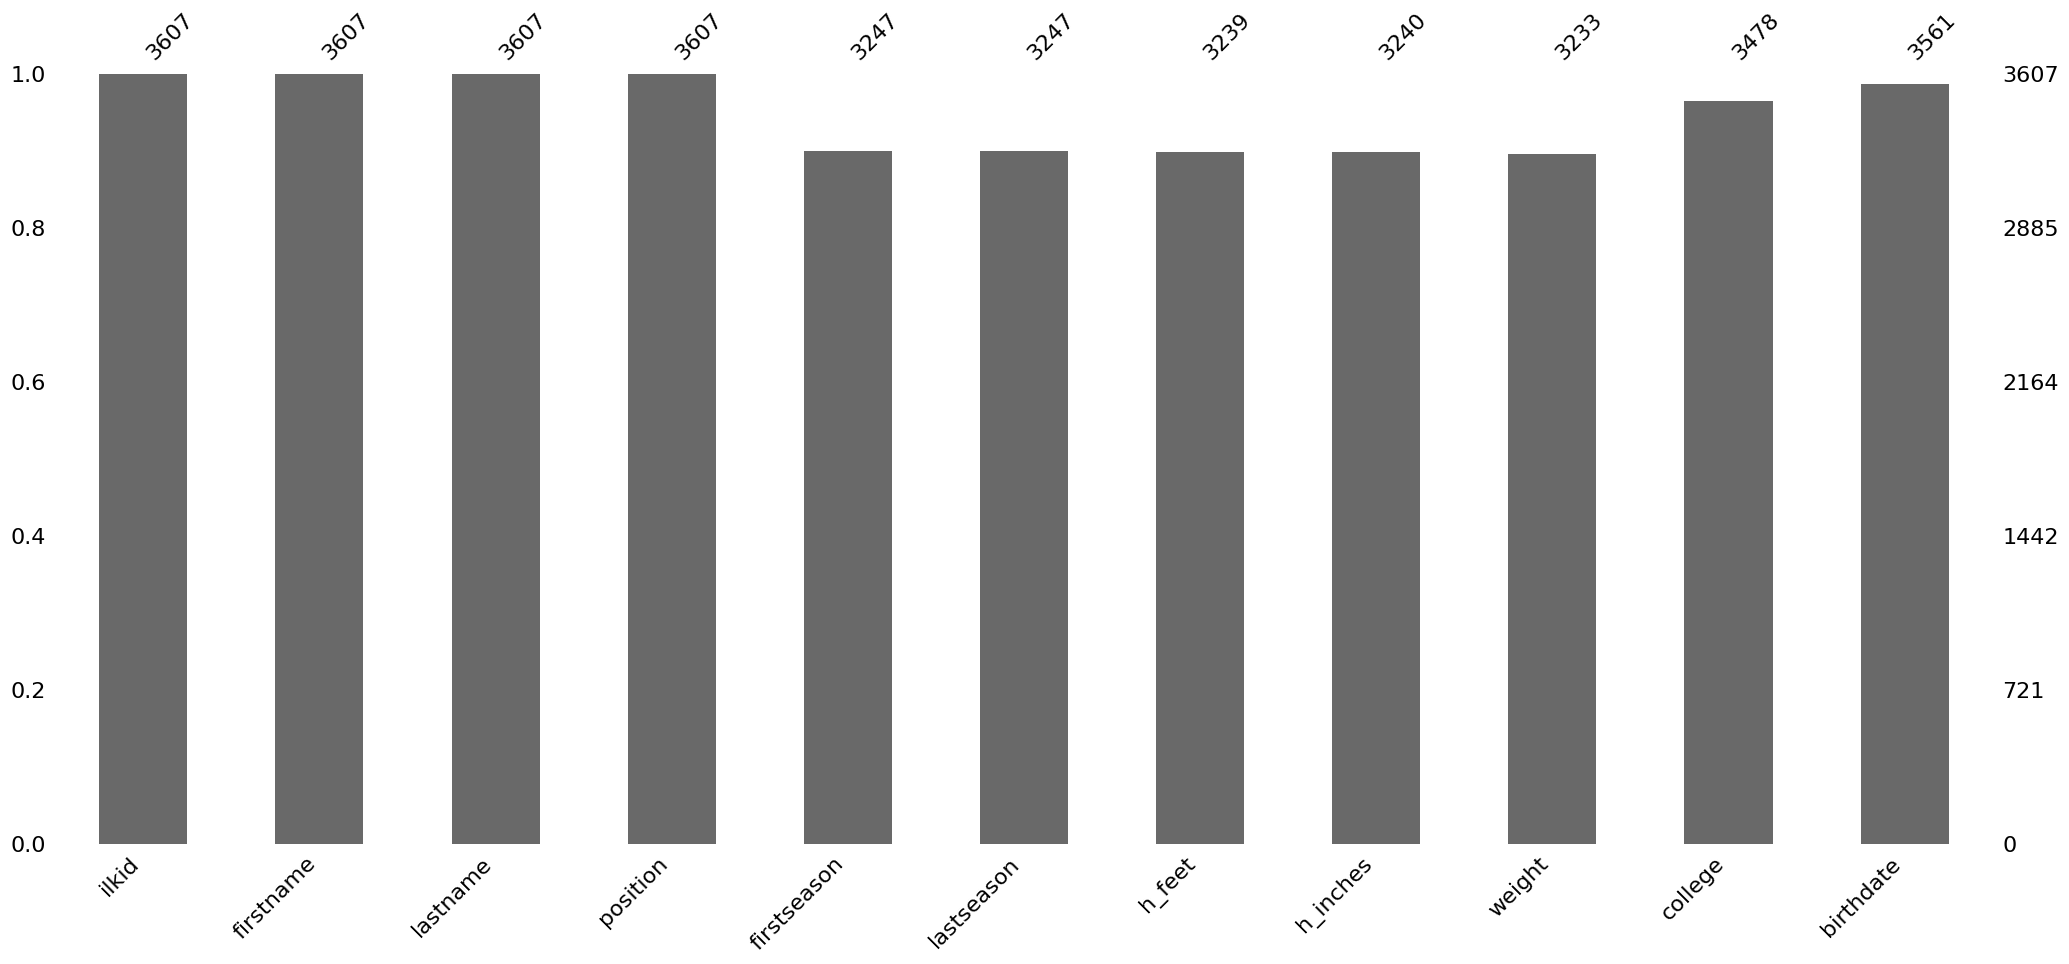

In [ ]:
msno.bar(players)

<Axes: >

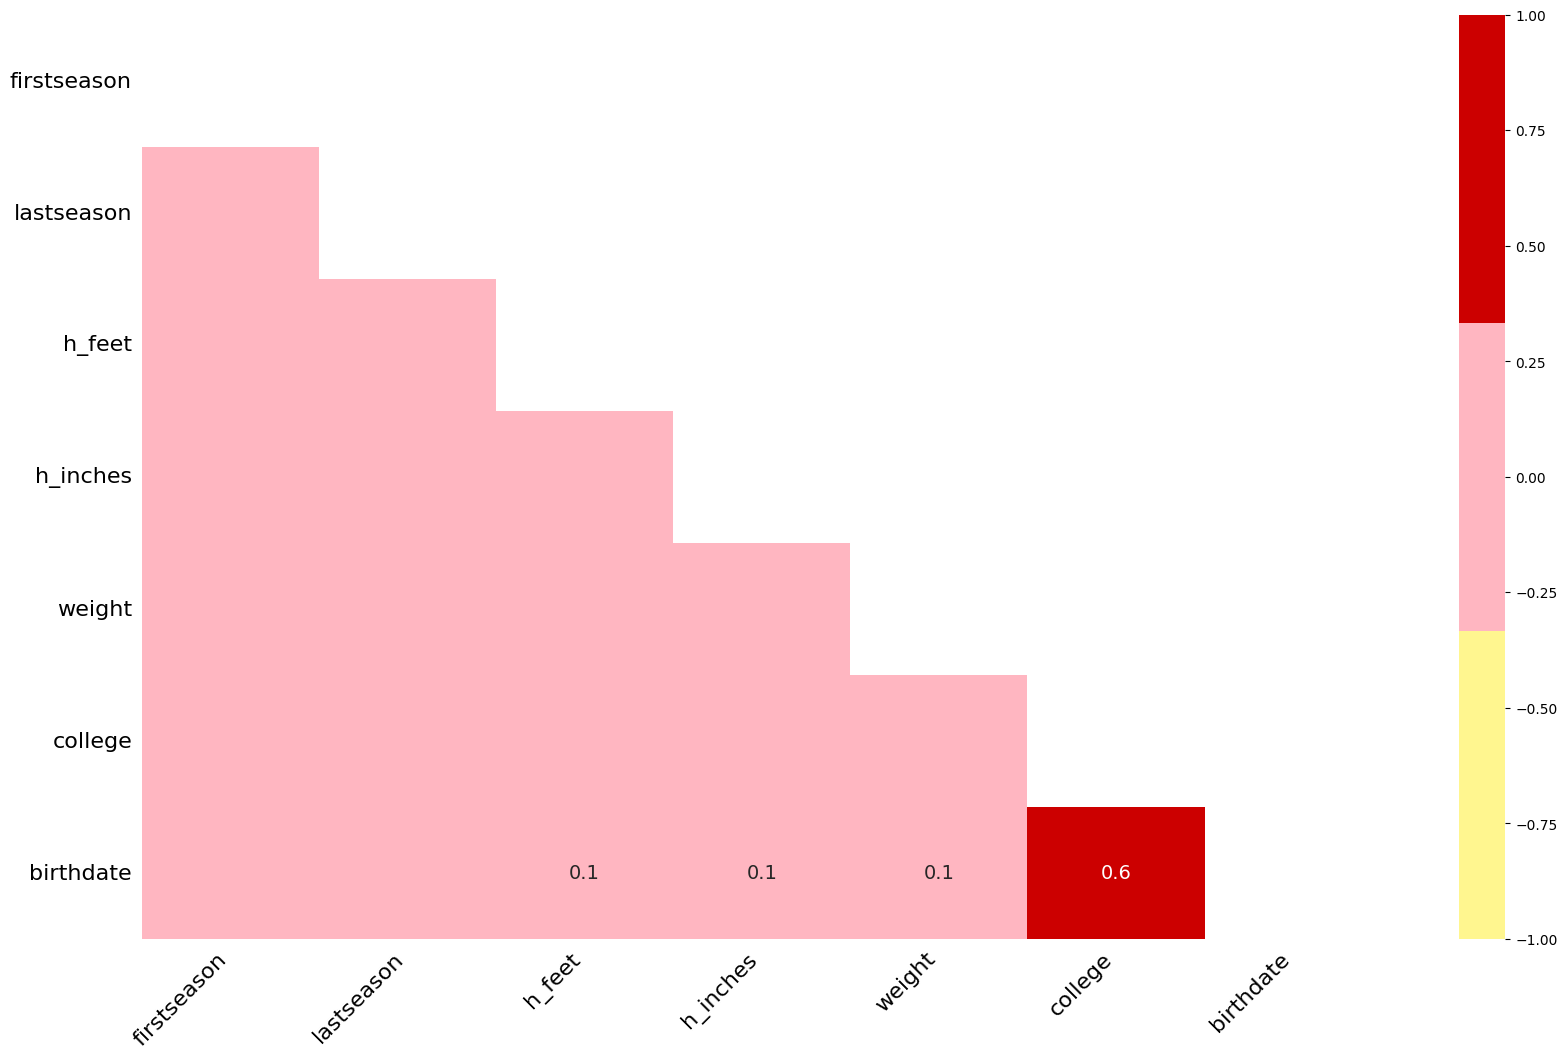

In [ ]:
from matplotlib.colors import ListedColormap
custom_cmap= ListedColormap(["#fff68f","#ffb6c1","#cc0000"])
msno.heatmap(players, cmap=custom_cmap, labels=True)

In [ ]:
players.isnull()

,ilkid,firstname,lastname,position,firstseason,lastseason,h_feet,h_inches,weight,college,birthdate
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3602,False,False,False,False,False,False,False,False,False,False,False
3603,False,False,False,False,False,True,True,False,False,False,False
3604,False,False,False,False,False,False,False,False,False,False,False
3605,False,False,False,False,False,False,True,False,False,False,False


too much data so is not really helpful

In [ ]:
players['lastseason'].max()

2004.0

this probably means that the data is collected until this year

In [ ]:
players['position'].values

array(['C', 'G', 'F', ..., 'G', 'C', 'G'], dtype=object)

In [ ]:
players['position'].unique()

array(['C', 'G', 'F', 'PF', 'SF', 'PG', 'F-C', 'G-F', 'SG'], dtype=object)

In [ ]:
players['position'].nunique()

9

so there are 9 types of positions that the players can have

we have to deal with the missing values, we decided to take each column one by one and decide what approach we should have with each one;
first, we have missing values in the columnn

* first, we have missing values in the column
firstseason which represents the first year in which each player started playing so it is an important detail for the analysis. in this case, we will consider 2 categories out of the players, the ones with full information will be considered for the career evolution and the others will not.



*   second, we have missing values in the column lastseason, which may signify that the players are still active.
*   List item




In [ ]:
players['height']=players['h_feet']*12+players['h_inches']
players=players.drop(['h_feet','h_inches'],axis=1)
print(players)
# we created a single column for height
# which is formed by merging the value of height in inch and height in feet
# and in the end we have the total height in inch

          ilkid firstname    lastname position  firstseason  lastseason  \
0     LAWREED01        Ed    Lawrence        C       1980.0      1980.0   
1     MILESED01     Eddie       Miles        G       1963.0      1971.0   
2     BLOUNCO01     Corie      Blount        F       1993.0      2003.0   
3     WARLIBO01       Bob     Warlick        G       1965.0      1969.0   
4      ROTHSC01     Scott        Roth        F       1987.0         NaN   
...         ...       ...         ...      ...          ...         ...   
3602  FREEMRO01       Rod     Freeman        F       1973.0      1973.0   
3603  RICHAJA01     Jason  Richardson        G       2001.0         NaN   
3604  KRAMEST01     Steve      Kramer        G       1967.0      1969.0   
3605  NDIAYMA02   Mamadou      Ndiaye        C       2000.0      2004.0   
3606  STEPPBR01     Brook      Steppe        G       1982.0         NaN   

      weight         college            birthdate  height  
0      228.0   McNeese State  1952-12-0

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3607 entries, 0 to 3606
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ilkid        3607 non-null   object 
 1   firstname    3607 non-null   object 
 2   lastname     3607 non-null   object 
 3   position     3607 non-null   object 
 4   firstseason  3247 non-null   float64
 5   lastseason   3247 non-null   float64
 6   weight       3233 non-null   float64
 7   college      3478 non-null   object 
 8   birthdate    3561 non-null   object 
 9   height       2912 non-null   float64
dtypes: float64(4), object(6)
memory usage: 281.9+ KB


In [ ]:
players['weight']= players.groupby('position')['weight'].transform(lambda x: x.fillna(x.median()))
print(players['weight'].head())

0    228.0
1    195.0
2    240.0
3    185.0
4    212.0
Name: weight, dtype: float64


In [ ]:
players['college'].unique()

array(['McNeese State', 'Seattle', 'Cincinnati', 'Denver', 'Wisconsin',
       'Michigan', 'UCLA', 'Southwest Louisiana', 'Queens',
       'Washington State', 'Fordham', 'Northwestern', 'Loyola Marymount',
       'Arizona', 'North Carolina State', 'Virginia', 'NYU',
       'Albany State (GA)', 'NE Oklahoma State', 'Drake', 'Bradley',
       'Iowa', "St. Joseph's (PA)", 'Utah', 'Tulane', 'Providence',
       'Jacksonville', 'Grambling', 'Idaho State', 'Northern Arizona',
       'West Virginia State', 'unknown', 'none', 'San Francisco    ',
       'Michigan State', 'Stanford', 'Tennessee State',
       'Northeast Louisiana', 'Santa Clara', "St. John's", 'Marquette',
       'Loyola (IL)', 'Evansville', 'Alabama', 'Xavier', 'Kentucky',
       'Creighton', 'North Carolina', 'Canisius', 'Manhattan',
       'Notre Dame', 'Western Kentucky', 'Oregon State', 'Miami (OH)',
       'DePaul', 'San Francisco', 'Illinois', 'New Orleans',
       'Western Michigan', 'Long Beach State', 'Indiana', 'LSU'

In [ ]:
players['college'].nunique()

525

In [ ]:
players['college']=players['college'].fillna('unknown')
print(players['college'].head(40))

0            McNeese State
1                  Seattle
2               Cincinnati
3                   Denver
4                Wisconsin
5                 Michigan
6                     UCLA
7      Southwest Louisiana
8                   Queens
9         Washington State
10                 Fordham
11            Northwestern
12                Michigan
13        Loyola Marymount
14                 Arizona
15    North Carolina State
16                Virginia
17                     NYU
18       Albany State (GA)
19       NE Oklahoma State
20                   Drake
21                 Bradley
22                    Iowa
23                    UCLA
24       St. Joseph's (PA)
25    North Carolina State
26                    Utah
27                  Tulane
28              Providence
29            Jacksonville
30               Grambling
31             Idaho State
32        Northern Arizona
33     West Virginia State
34                 unknown
35                     NYU
36                    none
3